In [1]:
import tensorflow as tf

print("TF version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices("GPU"))

2025-12-25 09:47:47.760876: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-25 09:47:47.863646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF version: 2.12.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2025-12-25 09:47:49.943814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-25 09:47:49.950794: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-25 09:47:49.951820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization,
    Dense, Dropout, Flatten
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
IMG_SIZE = (48, 48)
BATCH_SIZE = 64
EPOCHS = 40

TRAIN_DIR = "dataset/train"
TEST_DIR  = "dataset/test"

os.makedirs("results", exist_ok=True)

In [4]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

test_data = test_gen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_data.num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 64)       256       
 hNormalization)                                                 
                                                        

2025-12-25 09:47:53.963775: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-25 09:47:53.964558: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-25 09:47:53.965140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-25 09:47:54.144412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-25 09:47:54.145178: I tensorflow/compile

Non-trainable params: 448
_________________________________________________________________


In [6]:
callbacks = [
    EarlyStopping(patience=8, restore_best_weights=True),
    ReduceLROnPlateau(patience=4, factor=0.3)
]

In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/40


2025-12-25 09:47:55.027271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-12-25 09:47:56.337357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2025-12-25 09:47:56.636539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-12-25 09:47:56.691433: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x70c5f40466f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-25 09:47:56.691480: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-12-25 09:

359/359 [==============================] - ETA: 0s - loss: 1.8424 - accuracy: 0.2628

2025-12-25 09:50:12.326168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


359/359 [==============================] - 173s 473ms/step - loss: 1.8424 - accuracy: 0.2628 - val_loss: 2.0238 - val_accuracy: 0.2632 - lr: 0.0010
Epoch 2/40
359/359 [==============================] - 195s 544ms/step - loss: 1.6734 - accuracy: 0.3278 - val_loss: 1.7527 - val_accuracy: 0.3294 - lr: 0.0010
Epoch 3/40
359/359 [==============================] - 177s 494ms/step - loss: 1.5699 - accuracy: 0.3811 - val_loss: 1.4977 - val_accuracy: 0.4097 - lr: 0.0010
Epoch 4/40
359/359 [==============================] - 174s 484ms/step - loss: 1.5159 - accuracy: 0.4055 - val_loss: 1.4607 - val_accuracy: 0.4346 - lr: 0.0010
Epoch 5/40
359/359 [==============================] - 172s 479ms/step - loss: 1.4738 - accuracy: 0.4241 - val_loss: 1.4639 - val_accuracy: 0.4363 - lr: 0.0010
Epoch 6/40
359/359 [==============================] - 188s 523ms/step - loss: 1.4385 - accuracy: 0.4423 - val_loss: 1.5502 - val_accuracy: 0.4041 - lr: 0.0010
Epoch 7/40
359/359 [==============================] - 179

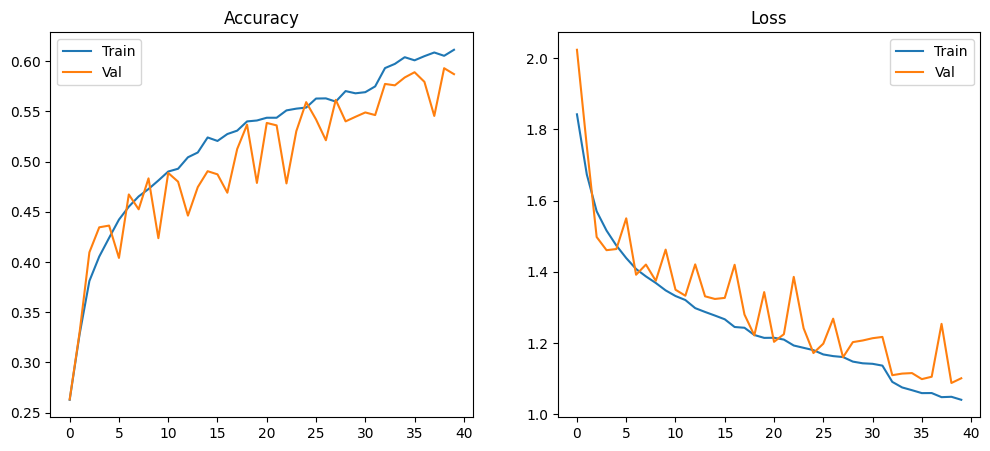

In [8]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()

plt.savefig("results/loss_accuracy.png", dpi=300)
plt.show()

In [9]:
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)

labels = list(test_data.class_indices.keys())

report = classification_report(
    y_true,
    y_pred,
    target_names=labels,
    output_dict=True
)

print(classification_report(y_true, y_pred, target_names=labels))

2025-12-25 11:47:59.755188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


113/113 [==============================] - 46s 403ms/step
              precision    recall  f1-score   support

       angry       0.52      0.54      0.53       958
     disgust       0.71      0.05      0.08       111
        fear       0.49      0.21      0.29      1024
       happy       0.87      0.81      0.83      1774
     neutral       0.48      0.70      0.57      1233
         sad       0.45      0.53      0.49      1247
    surprise       0.75      0.76      0.75       831

    accuracy                           0.60      7178
   macro avg       0.61      0.51      0.51      7178
weighted avg       0.61      0.60      0.59      7178



In [10]:
import pandas as pd

df_report = pd.DataFrame(report).transpose()
df_report.to_csv("results/classification_report.csv")

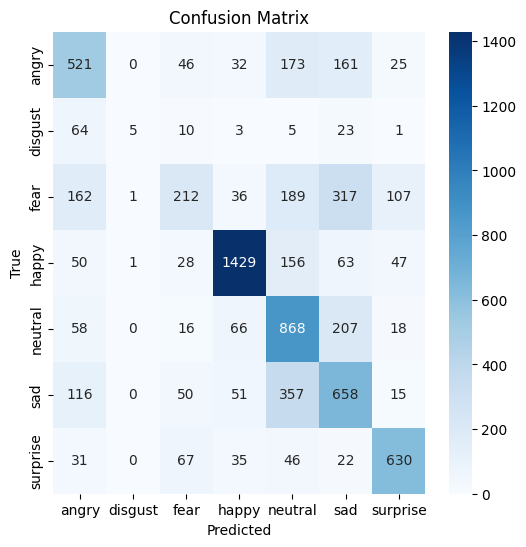

In [11]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=labels,
    yticklabels=labels,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.savefig("results/confusion_matrix.png", dpi=300)
plt.show()

In [12]:
model.save("results/emotion_cnn_model.h5")